# NTC temperature calculation

this notebook should illustrate the voltage curve that the NTC curcuit delivers on different inverter temperatures.

## NTC used

NCP18XH103F03RB
- R_0 10kOms
- B-Constants
  - 25-50 °C -> 3380K
  - 25-80 °C -> 3428K
  - 25-85 °C -> 3434K
  - 25-100 °C -> 3455K

## Curcuit

I use a voltage divider on the µC main voltage bus (+3V3) with the NTC on high side (R1). R2 is 10kOhms. 

In [17]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# formula for NTC thermistor resistance as a function of temperature
R_0, B, T = sympy.symbols('R_0 B T')
R_T = R_0 * sympy.exp(B * (1 / T - 1 / 298.15))
R_T

R_0*exp(B*(-0.00335401643468053 + 1/T))

In [11]:
# formula for voltage divider output
V_in, R_fixed = sympy.symbols('V_in R_fixed')
V_out = V_in * R_fixed/ (R_fixed + R_T)
V_out

R_fixed*V_in/(R_0*exp(B*(-0.00335401643468053 + 1/T)) + R_fixed)

In [21]:
# parameters

R_0_val = 10000  # resistance at 25C
B_val = 3455     # B coefficient
R_fixed_val = 10000  # fixed resistor in voltage divider
V_in_val = 3.3   # input voltage


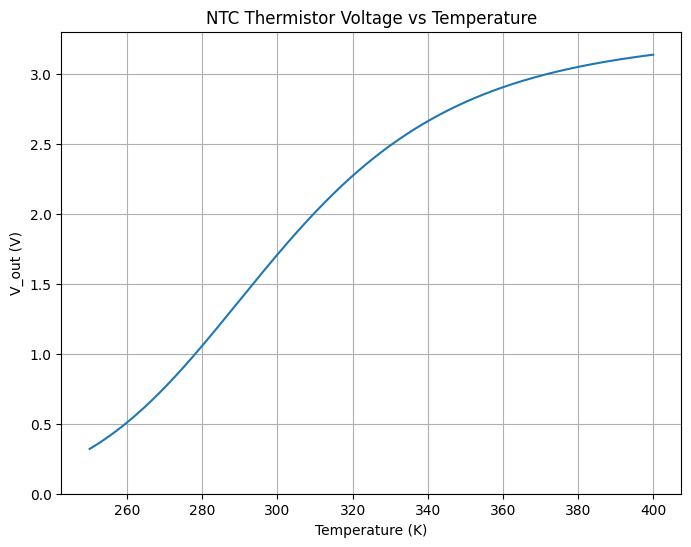

33000.0/(0.0927556734730098*exp(3455/T) + 10000)

In [31]:
# plot voltage vs temperature for given parameters
v_out_func = V_out.subs({R_0: R_0_val, B: B_val, R_fixed: R_fixed_val, V_in: V_in_val})

# Use lambdify to create a numerical function
v_out_lamb = sympy.lambdify(T, v_out_func, 'numpy')

# Temperature range in Kelvin (0°C to 100°C is 273K to 373K, but using 250K to 400K for safety)
T_vals = np.linspace(250, 400, 1000)
V_vals = v_out_lamb(T_vals)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(T_vals, V_vals)
plt.xlabel('Temperature (K)')
plt.ylabel('V_out (V)')
plt.title('NTC Thermistor Voltage vs Temperature')
plt.ylim(0, 3.3)
plt.grid(True)
plt.show()

v_out_func

In [25]:
V_out_2 = V_in * R_T / (R_fixed + R_T)
V_out_2

R_0*V_in*exp(B*(-0.00335401643468053 + 1/T))/(R_0*exp(B*(-0.00335401643468053 + 1/T)) + R_fixed)

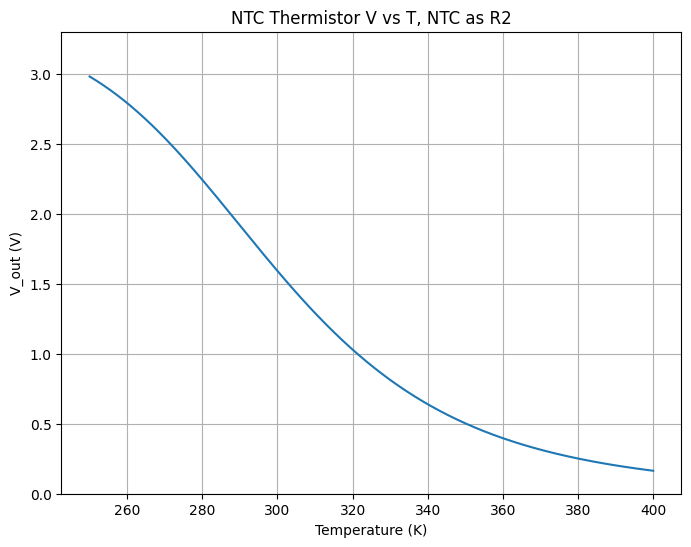

0.306093722460932*exp(3455/T)/(0.0927556734730098*exp(3455/T) + 10000)

In [30]:
v_out_2_func = V_out_2.subs({R_0: R_0_val, B: B_val, R_fixed: R_fixed_val, V_in: V_in_val})

# Use lambdify to create a numerical function
v_out_2_lamb = sympy.lambdify(T, v_out_2_func, 'numpy')

# Temperature range in Kelvin (0°C to 100°C is 273K to 373K, but using 250K to 400K for safety)
V2_vals = v_out_2_lamb(T_vals)

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(T_vals, V2_vals)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('V_out (V)')
ax.set_title('NTC Thermistor V vs T, NTC as R2')
ax.set_ylim(0, 3.3)
ax.grid(True)
plt.show()


v_out_2_func

In [ ]:
sympy.series(v_out_func, T, 298.15, 2).removeO()